# Stock Price Prediction of Microsoft

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


2022-11-13 00:57:29.473149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [5]:

df_final = pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [6]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-09,164.899994,170.399994,155.00,164.300003,143.949738,35164284
2003-07-10,167.000000,168.699997,164.50,167.000000,146.315338,10464179
2003-07-11,167.750000,174.850006,166.25,173.350006,151.878799,11740117
2003-07-14,174.250000,179.250000,174.25,177.949997,155.909042,5982324
2003-07-15,200.000000,200.000000,173.00,176.199997,154.375824,6173689


In [7]:

df_final.shape

(4796, 6)

In [8]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4.796000e+03
mean,3313.577901,3353.475295,3270.532762,3310.870308,3157.117590,1.156674e+06
std,2957.563706,2986.217123,2924.740391,2953.586970,2892.965576,1.583864e+06
min,164.000000,168.699997,155.000000,164.300003,143.949738,0.000000e+00
25%,860.037491,880.975006,839.350006,863.487503,768.292023,4.294990e+05
50%,1508.049988,1524.924988,1485.650024,1507.500000,1369.209595,6.822200e+05
75%,6497.250000,6580.712524,6382.500000,6494.737549,6274.448364,1.161262e+06
max,9966.000000,9996.400391,9725.000000,9832.450195,9527.599609,3.516428e+07


In [9]:
df_final.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

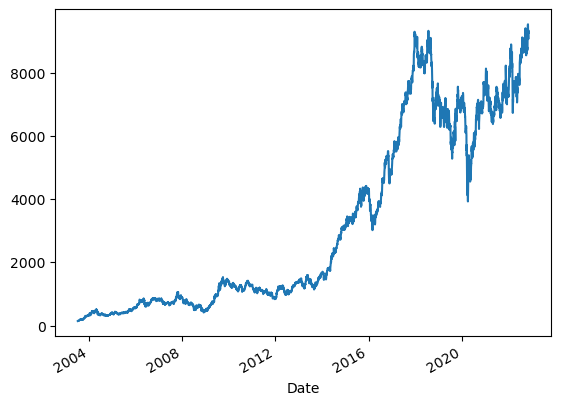

In [10]:
df_final['Adj Close'].plot()

# Correlation Analysis

In [11]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

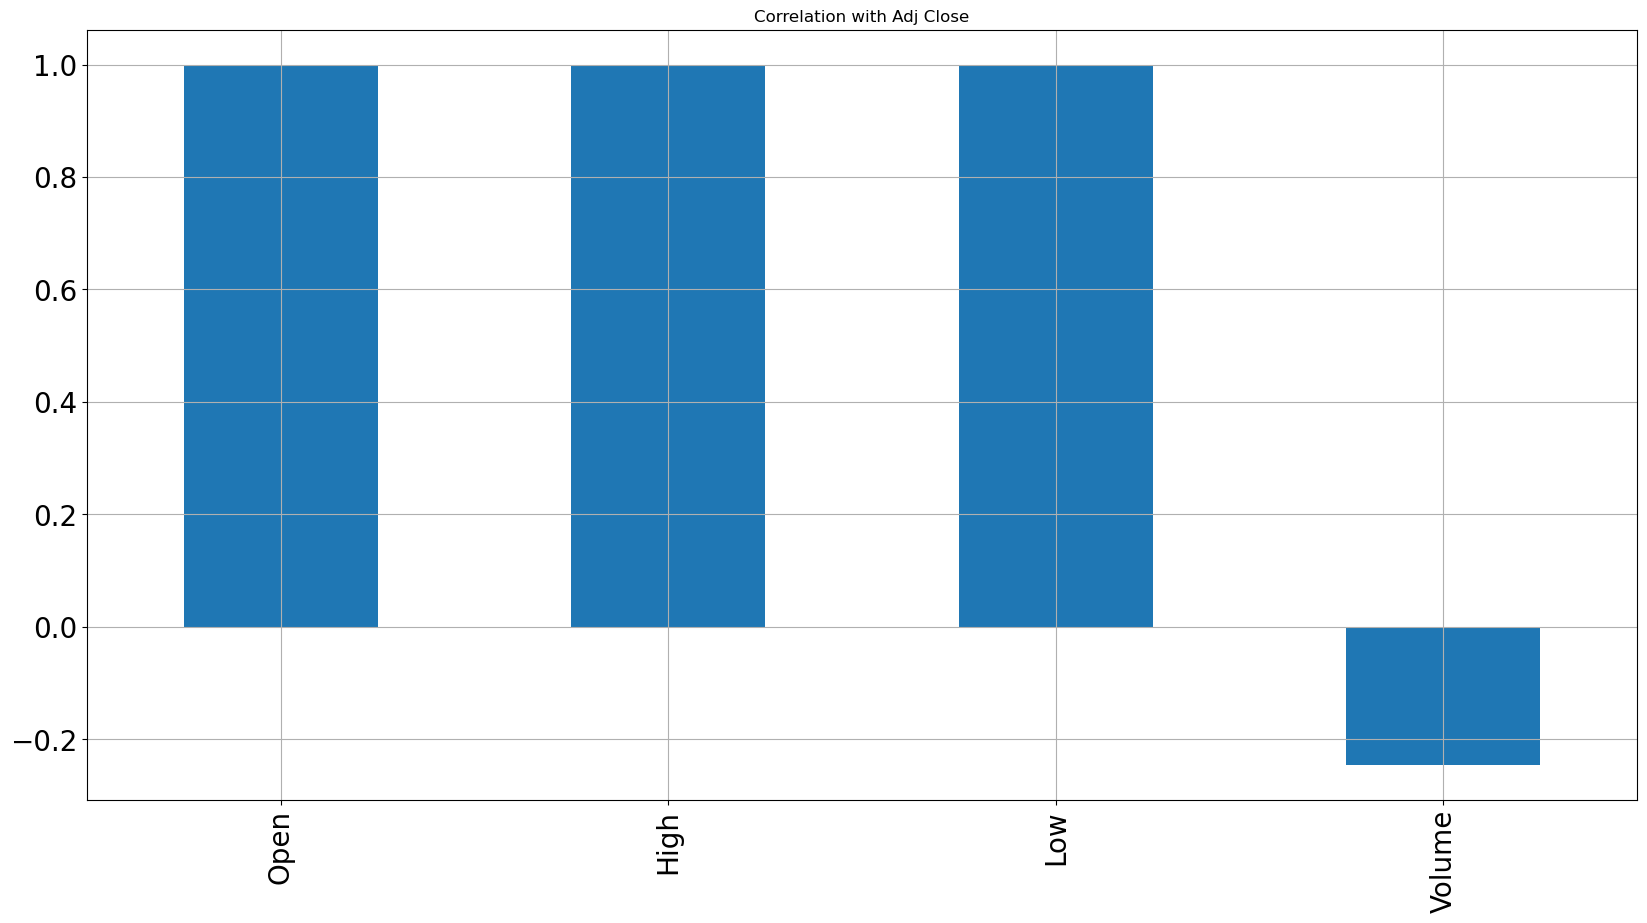

In [12]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [13]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-09,164.899994,170.399994,155.00,164.300003,143.949738,35164284
2003-07-10,167.000000,168.699997,164.50,167.000000,146.315338,10464179
2003-07-11,167.750000,174.850006,166.25,173.350006,151.878799,11740117
2003-07-14,174.250000,179.250000,174.25,177.949997,155.909042,5982324
2003-07-15,200.000000,200.000000,173.00,176.199997,154.375824,6173689


In [14]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2003-07-09,0.000092,0.000173,0.000000,1.000000
2003-07-10,0.000306,0.000000,0.000993,0.297580
2003-07-11,0.000383,0.000626,0.001176,0.333865
2003-07-14,0.001046,0.001073,0.002011,0.170125
2003-07-15,0.003673,0.003185,0.001881,0.175567


In [16]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2003-07-09,0.000092,0.000173,0.000000,1.000000
2003-07-10,0.000306,0.000000,0.000993,0.297580
2003-07-11,0.000383,0.000626,0.001176,0.333865
2003-07-14,0.001046,0.001073,0.002011,0.170125
2003-07-15,0.003673,0.003185,0.001881,0.175567


Shape of features :  (4796, 4)
Shape of target :  (4796, 1)


,Open,High,Low,Volume
Date,,,,
2022-11-03,0.922873,0.930157,0.941421,0.017542
2022-11-04,0.927760,0.931581,0.944206,0.013246
2022-11-07,0.929708,0.934512,0.950815,0.013338
2022-11-09,0.950454,0.947541,0.947231,0.017553
2022-11-10,0.921955,0.924128,0.931661,0.012675


,Adj Close
Date,
2022-11-03,9229.500000
2022-11-04,9333.299805
2022-11-07,9253.500000
2022-11-09,9097.250000
2022-11-10,9087.549805



 -----After process------ 

Shape of features :  (4706, 4)
Shape of target :  (4706, 1)


,Adj Close
Date,
2022-06-24,8393.487305
2022-06-27,8434.169922
2022-06-28,8453.244141
2022-06-29,8415.343750
2022-06-30,8347.638672


# Train test Split using Timeseriessplit

In [17]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [19]:

X_train.shape
print(X_train)

                Open      High       Low    Volume
Date                                              
2003-07-09  0.000092  0.000173  0.000000  1.000000
2003-07-10  0.000306  0.000000  0.000993  0.297580
2003-07-11  0.000383  0.000626  0.001176  0.333865
2003-07-14  0.001046  0.001073  0.002011  0.170125
2003-07-15  0.003673  0.003185  0.001881  0.175567
...              ...       ...       ...       ...
2020-10-06  0.682922  0.688981  0.697492  0.021505
2020-10-07  0.689247  0.702229  0.701207  0.031337
2020-10-08  0.706590  0.709352  0.717450  0.024207
2020-10-09  0.703530  0.711285  0.715361  0.023879
2020-10-12  0.708631  0.710878  0.715778  0.022742

[4279 rows x 4 columns]


In [44]:
X_test.shape

(427, 4)

In [45]:
y_train.shape

(4279,)

In [46]:
y_test.shape

(427,)

In [47]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

RMSE:  474.0384827652992
R2 score:  -2.050529890000219


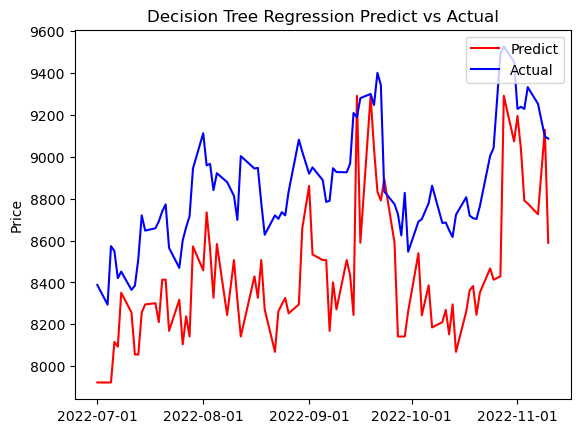

In [48]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

# Process the data for LSTM

In [21]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [26]:
print(X_tr_t[0][0])

[9.18173736e-05 1.72980136e-04 0.00000000e+00 1.00000000e+00]


# Model building : LSTM

In [51]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
535/535 [==============================] - 2s 2ms/step - loss: 13465999.0000
Epoch 2/200
535/535 [==============================] - 1s 2ms/step - loss: 13431181.0000
Epoch 3/200
535/535 [==============================] - 1s 2ms/step - loss: 13389747.0000
Epoch 4/200
535/535 [==============================] - 1s 2ms/step - loss: 13339523.0000
Epoch 5/200
535/535 [==============================] - 1s 3ms/step - loss: 13281026.0000
Epoch 6/200
535/535 [==============================] - 1s 2ms/step - loss: 13214894.0000
Epoch 7/200
535/535 [==============================] - 1s 2ms/step - loss: 13141686.0000
Epoch 8/200
535/535 [==============================] - 1s 2ms/step - loss: 13004439.0000
Epoch 9/200
535/535 [==============================] - 1s 3ms/step - loss: 12877019.0000
Epoch 10/200
535/535 [==============================] - 1s 2ms/step - loss: 12749333.0000
Epoch 11/200
535/535 [==============================] - 1s 2ms/step - loss: 12615091.0000
Epoch 12/200
535/53

KeyboardInterrupt: 

In [55]:
##
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(1, X_train.shape[1])))
        #units=no. of neurons in layer
        #input_shape=(timesteps,no. of cols/features)
        #return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
model_lstm.add(Dropout(0.1))
        
        #Add 2nd LSTM layer
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.1))
        
        #Add 3rd LSTM layer
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.1))
        
        #Add 4th LSTM layer
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.1))
        
        #Add o/p layer
model_lstm.add(Dense(units=1))
        
        #Compile
model_lstm.compile(optimizer='adam',loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
535/535 [==============================] - 6s 5ms/step - loss: 13327200.0000
Epoch 2/200
535/535 [==============================] - 3s 5ms/step - loss: 13229217.0000
Epoch 3/200
535/535 [==============================] - 3s 6ms/step - loss: 13149655.0000
Epoch 4/200
535/535 [==============================] - 3s 5ms/step - loss: 13073276.0000
Epoch 5/200
502/535 [===========================>..] - ETA: 0s - loss: 11300569.0000

KeyboardInterrupt: 

# Evaluation of Model

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


## Predictions made by LSTM

In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

In [ ]:
print('LSTM: %f'%score_lstm)

In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

# LSTM's Prediction Visual

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


# Converting Prediction data
In this step I have made the prediction of test data and will convert the dataframe to csv so that we can see the price difference between actual and predicted price.

In [ ]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact 